<a href="https://colab.research.google.com/github/Balwant195/CV-Anisotropic-Diffusion/blob/main/Computer_Vision_Anisotropic_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

from scipy import ndimage
import cv2

In [5]:
image = np.asarray(Image.open("/content/drive/MyDrive/MTech/Computer Vision/beautiful-g37722cfc6_1920.jpg").convert("L"))
image

array([[163, 163, 163, ..., 168, 167, 167],
       [164, 164, 164, ..., 168, 168, 167],
       [165, 165, 165, ..., 169, 169, 169],
       ...,
       [205, 204, 202, ...,  41,  43,  42],
       [204, 203, 202, ...,  40,  43,  41],
       [203, 202, 201, ...,  40,  45,  43]], dtype=uint8)

In [6]:
r, c = image.shape
r, c

(1280, 1920)

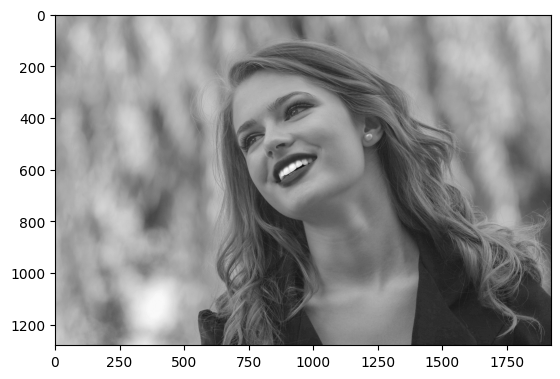

In [7]:
plt.imshow(image,"gray")

In [8]:
#unique, counts = np.unique(image1, return_counts=True)
#np.asarray((unique, counts)).T

In [9]:
def convolution(image, filter):
    m, n = filter.shape  # m = n in our case
    a, b = image.shape
    x = a - m + 1
    y = b - n + 1
    con_image = np.zeros((x,y))
    for i in range(x):
      for j in range(y):
        con_image[i][j] = np.sum(image[i:i+m, j:j+n]*filter)

    return con_image

In [10]:
sobelx = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

sobely = sobelx.T

In [11]:
gx = convolution(image, sobelx)
gy = convolution(image, sobely)

In [12]:
g = np.sqrt(gx**2+gy**2)

In [13]:
hist, bin_edge = np.histogram(g)
hist, bin_edge

(array([2349512,   88619,   11048,    1576,     264,      57,      34,
             28,      36,      30]),
 array([  0.        ,  90.59028646, 181.18057291, 271.77085937,
        362.36114582, 452.95143228, 543.54171873, 634.13200519,
        724.72229164, 815.3125781 , 905.90286455]))

In [14]:
B = hist[1]
lamda = 0.25

In [17]:
def anisotropic_diffusion(image):

  sobelx = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

  sobely = sobelx.T

  gx = convolution(image, sobelx)
  gy = convolution(image, sobely)

  g = np.sqrt(gx**2+gy**2)

  hist, bin_edge = np.histogram(g)

  B = hist[1]

  filter_n = np.array([[-1],[1]])
  filter_s = np.array([[1],[-1]])
  filter_e = np.array([[1, -1]])
  filter_w = np.array([[-1, 1]])

  delta_n = np.zeros_like(image)
  delta_s = np.zeros_like(image)
  delta_e = np.zeros_like(image)
  delta_w = np.zeros_like(image)

  delta_n[1:, :] = convolution(image,filter_n)
  delta_s[:-1, :] = convolution(image,filter_s)
  delta_e[:, 1:] = convolution(image,filter_e)
  delta_w[:, :-1] = convolution(image,filter_w)

  c_n = np.exp(-(delta_n/B)**2)
  c_s = np.exp(-(delta_s/B)**2)
  c_e = np.exp(-(delta_e/B)**2)
  c_w = np.exp(-(delta_w/B)**2)

  image = image + lamda*(c_n*delta_n + c_s*delta_s + c_e*delta_e + c_w*delta_w)

  return image

In [18]:
anisotropic_image = anisotropic_diffusion(image)

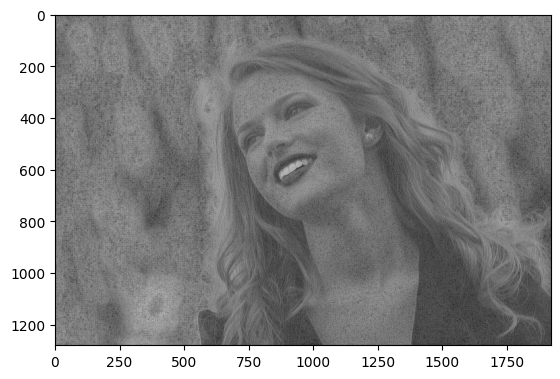

In [19]:
plt.imshow(anisotropic_image,"gray")